<a href="https://colab.research.google.com/github/drOluOla/Job_Interviews_2025/blob/main/i_dot_ai_backup_final_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Interview Question**
Please select a general government challenge where AI could drive significant public impact, in line with i.AI's mission to improve services, growth, and citizen outcomes. How would you design and implement an AI solution to address this challenge? In your response, address key considerations such as data strategy, model selection, ethical safeguards, and integration with existing government systems.

# **AI Opportunity**

In light of the government's commitment to early intervention to prevent young people from losing touch with education or employment before the age of 18, and its promise to offer tailored careers advice and meaningful work experience, how can AI-driven digital solutions be effectively designed and implemented as part of the new universal jobs and careers service? These solutions must support scalable and personalised delivery of guidance, help young people confidently identify their next steps, and provide access to work experience opportunities, including progress toward two weeks' experience. They should also ensure support reaches those under 18 who are not in school or college, through close collaboration with local stakeholders, ultimately enabling successful transitions to post-18 pathways.

# **Solution Overview**

To support the government's ambition of preventing disengagement from education or employment before the age of 18, we propose the integration of AI-powered simulated work trials as part of the new universal jobs and careers service. Building on the approach developed by StintAgents, these simulations offer young people immersive, low-risk introductions to real-world tasks across a range of sectors. Designed to replicate the decision-making, communication, and problem-solving involved in actual roles, the trials can be tailored to individual interests and skill levels, enabling personalised career exploration at scale. By partnering with schools, colleges, and local organisations, this solution can extend meaningful work experience to all young people, including those not currently in education, and equip them with the confidence and insight needed to navigate their next steps and transition successfully into employment, education, or training after 18.

### **Multi-Modal Agentic Systems**

Multi-Modal Agentic Systems represent a significant AI advancement that processes text, voice, and visual inputs through large language models combined with real-time information retrieval and autonomous decision-making, creating dynamic, context-aware interactions particularly engaging for younger users. Voice Agent Pipelines build on this technology by integrating speech recognition, natural language understanding, and text-to-speech synthesis to deliver real-time, personalized career guidance and simulated work experiences for individuals under 18, creating immersive platforms that help young people confidently explore career options and prepare for their transition to adult pathways through natural conversational engagement.

### **Voice Agent Pipeline Design**

The image illustrates a Voice Pipeline for an AI-powered voice assistant system. Here's a brief summary of the process:

- User Input (Speech): The user speaks into the system (input audio).
- Speech to Text: The spoken input is transcribed into text.
- Triage Agent: This central agent analyzes the transcribed text and routes it to the appropriate specialized agent based on intent:
- Search Agent: For real-time answers via web search.
- Knowledge Agent: For product-related queries using file-based knowledge
- Account Agent: For handling account-related actions.
- Response Generation: The selected agent processes the query and generates a text response.
- Text to Speech: The response is converted back into audio.
- LLM Output (Speech): The synthesized audio is delivered to the user.

This pipeline ensures intelligent routing and voice interaction using multiple AI agents.

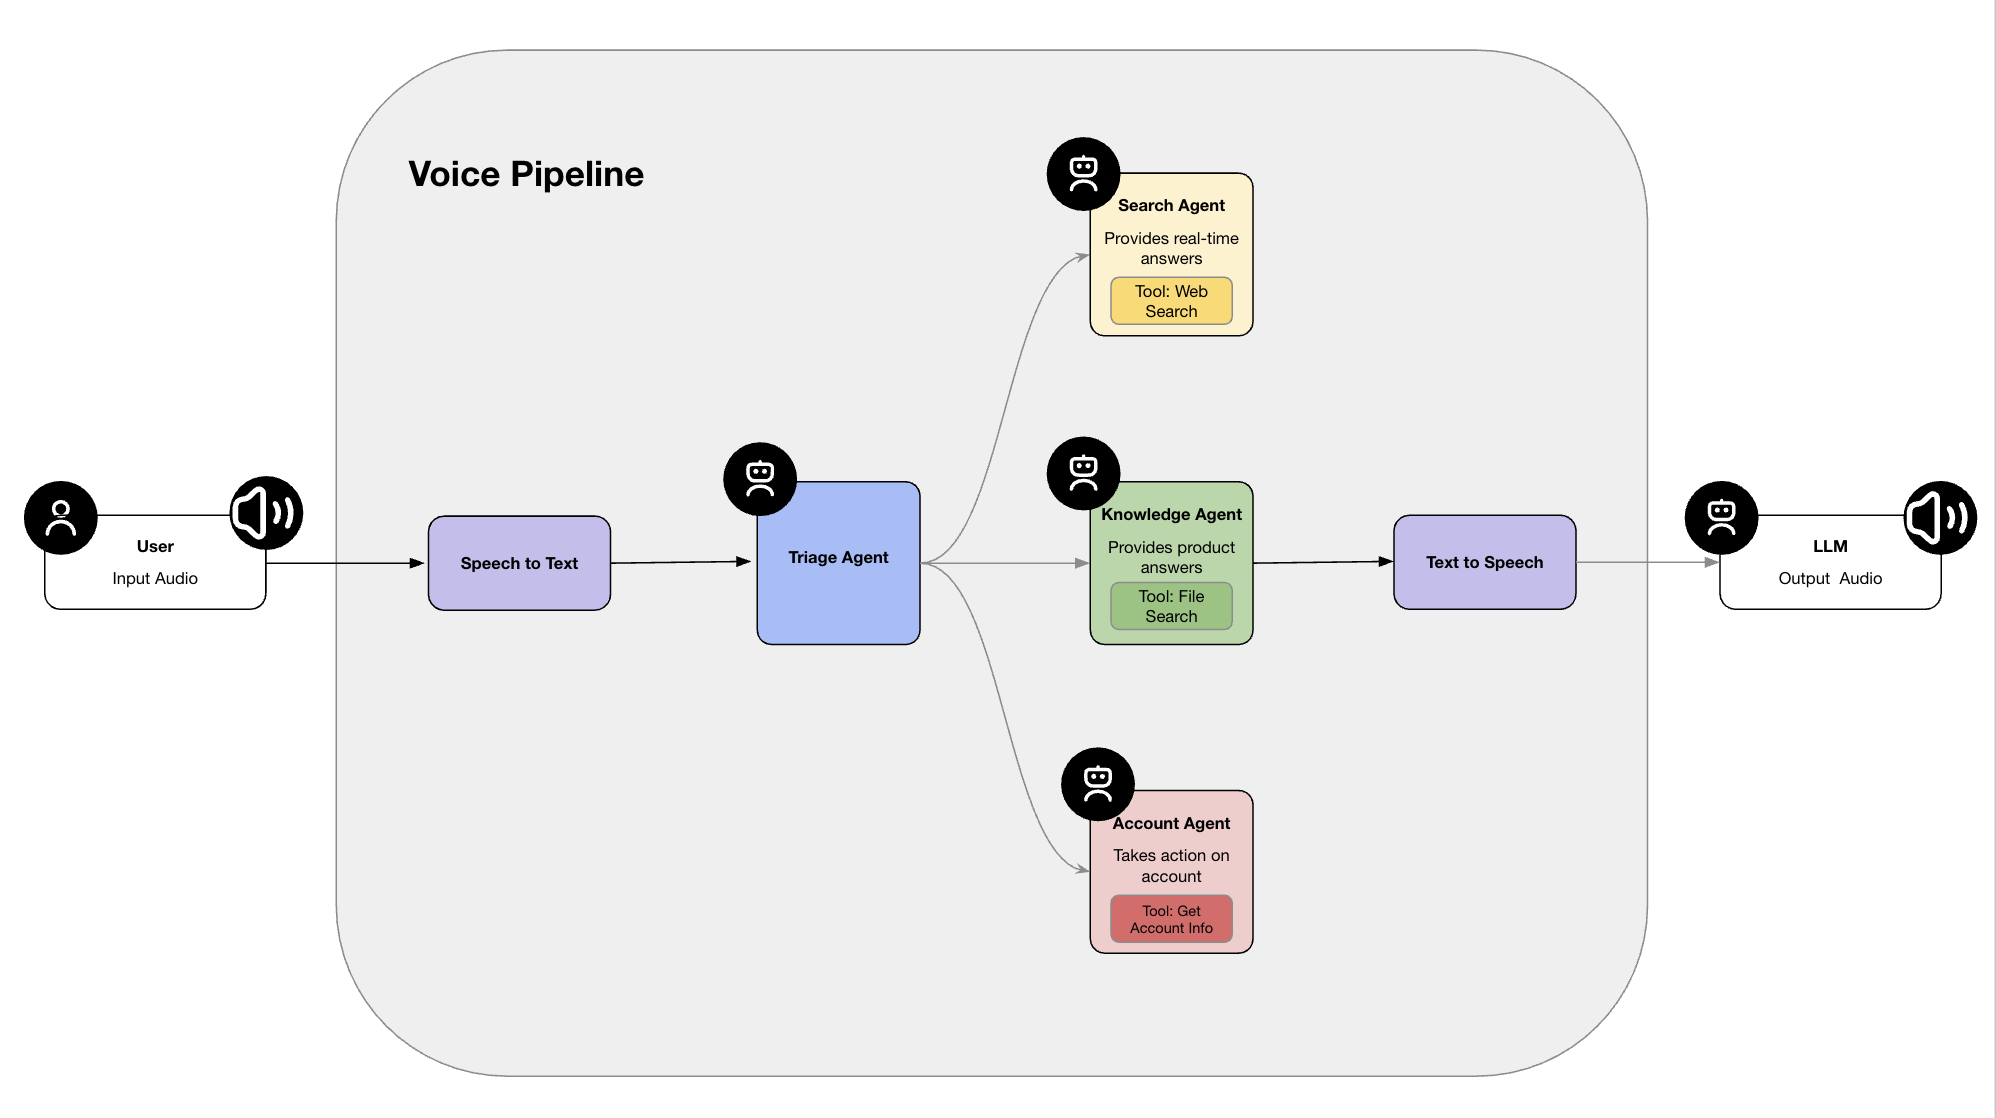

# **Implementaton**

### **Tools and Packages**

* **AI Assisted Coding Assitant:** For generating suggested boilerplate codes and agent configs.

* **Large Language Models:** For tts and stt.
  - gpt-4o-mini
  - gpt-4o-mini-tts
  - OpenAI Agents SDK

* **Gradio:** For prototyping the multi-agent system with a friendly web interface

### **Code Walkthrough**

#### **Package Installation**

In [21]:
!pip install openai-agents[voice]
!pip install gradio numpy librosa soundfile

  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
  Using cached numpy-2.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-2.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-

In [22]:
import os
from google.colab import userdata

import io
import wave
import openai

import gradio as gr
import numpy as np
import asyncio
import random

from typing import AsyncIterator, Optional, Tuple, Dict, Any
from agents import Agent, Runner, function_tool
from agents.extensions.handoff_prompt import prompt_with_handoff_instructions
from dataclasses import dataclass, field

In [23]:
openai_api_key = userdata.get('OPENAI_API_KEY')

agent = Agent(name="Assistant", instructions="You are a helpful assistant")

if openai_api_key:
    os.environ["OPENAI_API_KEY"] = openai_api_key
    result = await Runner.run(agent, "Who is the president of nigeria")
    print(result.final_output)
else:
    print("Please set the OPENAI_API_KEY environment variable in Colab Secrets.")


As of 2023, the President of Nigeria is Bola Ahmed Tinubu. He took office on May 29, 2023.


#### **Global Variables**

In [24]:
# Voice Configuration for Different Agents
AGENT_VOICES = {
    "HRManager": {
        "voice": "alloy",
        "speed": 1.0,
        "description": "Professional & Welcoming",
        "emoji": "👩‍💼",
        "color": "#FF6B6B",
        "specialty": "HR Policies & Benefits"
    },
    "ITStaff": {
        "voice": "sage",
        "speed": 1.1,
        "description": "Technical & Helpful",
        "emoji": "💻",
        "color": "#4ECDC4",
        "specialty": "IT Setup & Support"
    },
    "LineManager": {
        "voice": "echo",
        "speed": 1.0,
        "description": "Supportive & Strategic",
        "emoji": "📊",
        "color": "#45B7B8",
        "specialty": "Team Leadership & Goals"
    },
    "AIColleague": {
        "voice": "nova",
        "speed": 1.0,
        "description": "Friendly & Collaborative",
        "emoji": "🤖",
        "color": "#95E1D3",
        "specialty": "General Workplace Support"
    }
}

#### **Utilities**

In [25]:
# def generate_speech(text: str, agent_name: str = "HRManager") -> bytes:
#     """Generate speech with agent-specific voice characteristics"""
#     try:
#         voice_config = AGENT_VOICES.get(agent_name, AGENT_VOICES["HRManager"])
#         print(f"[debug] Generating speech for {agent_name} with voice '{voice_config['voice']}'")

#         response = openai.audio.speech.create(
#             model="gpt-4o-mini-tts",
#             voice=voice_config["voice"],
#             input=text,
#             speed=voice_config["speed"]
#         )
#         return response.content
#     except Exception as e:
#         print(f"[ERROR] Speech generation failed: {e}")
#         return None

# def create_agent_avatar(agent_name: str, is_active: bool = False) -> str:
#     """Create avatar for any agent with active/inactive states"""
#     config = AGENT_VOICES.get(agent_name, AGENT_VOICES["HRManager"])

#     # Simple active/inactive styling
#     if is_active:
#         ring_style = f"box-shadow: 0 0 20px {config['color']}; border-color: {config['color']}; animation: pulse 1s infinite;"
#         bg_overlay = f"{config['color']}20"
#         status_text = '<div style="margin-top: 10px; color: #4CAF50; font-weight: bold;">🎤 SPEAKING</div>'
#     else:
#         ring_style = ""
#         bg_overlay = "rgba(255, 255, 255, 0.05)"
#         status_text = ""

#     return f"""<style>
#                   @keyframes pulse {{
#                   0% {{ opacity: 1; }}
#                   50% {{ opacity: 0.7; }}
#                   100% {{ opacity: 1; }}
#                   }}
#                </style>
#                <div style="
#                   text-align: center;
#                   padding: 20px;
#                   border-radius: 15px;
#                   background: linear-gradient(135deg, {config['color']}20, {config['color']}10);
#                   border: 3px solid {config['color']};
#                   {ring_style}
#                   transition: all 0.3s ease;
#                   height: 220px;
#                   display: flex;
#                   flex-direction: column;
#                   justify-content: center;
#                   align-items: center;
#                   position: relative;
#                   overflow: hidden;
#                 ">
#                 <div style="
#                       position: absolute;
#                       top: 0;
#                       left: 0;
#                       right: 0;
#                       bottom: 0;
#                       background: {bg_overlay};
#                       z-index: 1;
#                 "></div>
#                 <div style="position: relative; z-index: 2;">
#                       <div style="font-size: 4em; margin-bottom: 10px;">{config['emoji']}</div>
#                       <div style="font-weight: bold; font-size: 1.2em; color: #333; margin-bottom: 5px;">
#                           {agent_name}
#                       </div>
#                       <div style="color: #666; font-size: 0.9em; margin-bottom: 5px;">
#                           {config['description']}
#                       </div>
#                       <div style="color: #888; font-size: 0.8em;">
#                           {config['specialty']}
#                       </div>
#                       {status_text}
#                 </div>
#               </div>
#             """

# # Conversation tracking
# conversation_sessions = {}

# @dataclass
# class UserData:
#     """Shared state across all agents"""
#     active_agent_type: Optional[str] = None
#     conversation_history: list = field(default_factory=list)
#     prev_agent_type: Optional[str] = None

#     # Additional context
#     last_transcript: str = ""
#     turn_count: int = 0
#     last_messages: Dict[str, str] = field(default_factory=dict)

#     def log_response(self, agent_name: str, message: str):
#         """Log agent response"""
#         self.active_agent_type = agent_name
#         self.conversation_history.append({"agent": agent_name, "message": message})
#         self.last_messages[agent_name] = message
#         self.turn_count += 1

# class SessionTracker:
#     """Session tracking for conversation management"""
#     def __init__(self):
#         self.user_data = UserData()

#     def log_response(self, agent_name: str, message: str):
#         self.user_data.log_response(agent_name, message)

#     def get_user_data(self) -> UserData:
#         return self.user_data

# # Audio processing functions
# def preprocess_audio(audio_data, sample_rate):
#     """Properly preprocess audio for better transcription"""
#     if not isinstance(audio_data, np.ndarray):
#         audio_data = np.array(audio_data)

#     if audio_data.dtype == np.int16:
#         audio_data = audio_data.astype(np.float32) / 32768.0
#     elif audio_data.dtype == np.int32:
#         audio_data = audio_data.astype(np.float32) / 2147483648.0
#     elif audio_data.dtype != np.float32:
#         audio_data = audio_data.astype(np.float32)

#     if len(audio_data.shape) > 1:
#         audio_data = np.mean(audio_data, axis=1)

#     max_val = np.max(np.abs(audio_data))
#     if max_val > 0:
#         audio_data = audio_data / max_val * 0.95

#     if sample_rate != 16000:
#         target_length = int(len(audio_data) * 16000 / sample_rate)
#         audio_data = np.interp(
#             np.linspace(0, len(audio_data), target_length),
#             np.arange(len(audio_data)),
#             audio_data
#         )
#         sample_rate = 16000

#     return audio_data, sample_rate

# def transcribe_audio_openai(audio_data, sample_rate=16000):
#     """Use OpenAI Whisper for transcription"""
#     try:
#         audio_int16 = (audio_data * 32767).astype(np.int16)
#         wav_buffer = io.BytesIO()

#         with wave.open(wav_buffer, 'wb') as wav_file:
#             wav_file.setnchannels(1)
#             wav_file.setsampwidth(2)
#             wav_file.setframerate(sample_rate)
#             wav_file.writeframes(audio_int16.tobytes())

#         wav_buffer.seek(0)
#         wav_buffer.name = "audio.wav"

#         response = openai.audio.transcriptions.create(
#             model="whisper-1",
#             file=wav_buffer,
#             language="en",
#             response_format="text",
#             temperature=0.2
#         )

#         transcription = response.strip() if isinstance(response, str) else str(response).strip()
#         print(f"[debug] OpenAI Whisper transcription: {transcription}")
#         return transcription

#     except Exception as e:
#         print(f"[ERROR] OpenAI transcription failed: {e}")
#         return None

# async def get_agent_response(text: str, session_id: str = "default") -> tuple[str, str]:
#     """Get response starting with HR Manager as main entry point"""
#     try:
#         if session_id not in conversation_sessions:
#             conversation_sessions[session_id] = SessionTracker()

#         session_tracker = conversation_sessions[session_id]
#         user_data = session_tracker.get_user_data()

#         # Always start with HR Manager as the main entry point
#         result = await Runner.run(hr_manager, input=text)

#         # The active agent should be result.last_agent.name
#         active_agent = result.last_agent.name if result.last_agent else "HRManager"
#         response_text = result.final_output

#         print(f"[debug] Final agent that responded: {active_agent}")

#         # Check if handoff occurred by comparing with starting agent
#         if active_agent != "HRManager":
#             print(f"[debug] SUCCESS: Handoff occurred from HRManager to {active_agent}")
#         else:
#             print(f"[debug] NO HANDOFF: HRManager still Active")

#         session_tracker.log_response(active_agent, response_text)

#         return response_text, active_agent

#     except Exception as e:
#         print(f"[ERROR] Response failed: {e}")
#         import traceback
#         traceback.print_exc()
#         return f"I apologize, but I'm having trouble processing your request right now. Error: {str(e)}", "HRManager"

# def process_voice_input(audio, session_id: str = "default"):
#     """Process voice input with HR Manager as main entry point"""
#     print(f"[DEBUG] Processing voice input with HR Manager as main entry point")

#     if audio is None:
#         return (
#             None,  # No audio output
#             "",    # Empty transcription
#             "❌ No audio data received",  # Status message
#             create_agent_avatar("HRManager"),     # HR Manager avatar (main)
#             create_agent_avatar("AIColleague"),   # AI Colleague avatar
#             create_agent_avatar("ITStaff"),       # IT Staff avatar
#             create_agent_avatar("LineManager")    # Line Manager avatar
#         )

#     try:
#         # Handle audio format
#         if isinstance(audio, tuple):
#             sample_rate, audio_data = audio
#         elif hasattr(audio, 'shape'):
#             sample_rate = 24000
#             audio_data = audio
#         else:
#             return (
#                 None, "", "Invalid audio format",
#                 create_agent_avatar("HRManager"),
#                 create_agent_avatar("AIColleague"),
#                 create_agent_avatar("ITStaff"),
#                 create_agent_avatar("LineManager")
#             )

#         # Check for empty audio
#         if hasattr(audio_data, 'size') and audio_data.size == 0:
#             return (
#                 None, "", "Empty audio data",
#                 create_agent_avatar("HRManager"),
#                 create_agent_avatar("AIColleague"),
#                 create_agent_avatar("ITStaff"),
#                 create_agent_avatar("LineManager")
#             )

#         # Process audio
#         processed_audio, processed_sample_rate = preprocess_audio(audio_data, sample_rate)

#         # Transcribe
#         transcription = transcribe_audio_openai(processed_audio, processed_sample_rate)

#         if not transcription:
#             return (
#                 None, "", "Transcription failed",
#                 create_agent_avatar("HRManager"),
#                 create_agent_avatar("AIColleague"),
#                 create_agent_avatar("ITStaff"),
#                 create_agent_avatar("LineManager")
#             )

#         # Get agent response starting with HR Manager
#         loop = asyncio.new_event_loop()
#         asyncio.set_event_loop(loop)

#         try:
#             response_text, active_agent = loop.run_until_complete(get_agent_response(transcription, session_id))
#         finally:
#             loop.close()

#         # Generate speech
#         speech_audio = generate_speech(response_text, active_agent)
#         output_audio = None
#         if speech_audio:
#             try:
#                 output_audio = (24000, np.frombuffer(speech_audio, dtype=np.int16))
#             except Exception as e:
#                 print(f"Speech conversion failed: {e}")

#         # Get session tracker for messages
#         session_tracker = conversation_sessions.get(session_id, SessionTracker())
#         user_data = session_tracker.get_user_data()

#         # Create status message
#         status_message = f"""
#                           🎯 Onboarding Session #{user_data.turn_count}
#                           📝 You said: "{transcription}"
#                           🗣️ {active_agent} responded (HR Manager entry point)
#                           🎵 Speech generated
#                           ✅ Ready for your next question!
#                                   """.strip()

#         # Update avatars - mark active agent
#         hr_avatar = create_agent_avatar("HRManager",active_agent == "HRManager")
#         ai_colleague_avatar = create_agent_avatar("AIColleague", active_agent == "AIColleague")
#         it_avatar = create_agent_avatar("ITStaff", active_agent == "ITStaff")
#         manager_avatar = create_agent_avatar("LineManager", active_agent == "LineManager")

#         return output_audio, transcription, status_message, hr_avatar, ai_colleague_avatar, it_avatar, manager_avatar

#     except Exception as e:
#         error_msg = f"Error: {str(e)}"
#         print(f"[ERROR] {error_msg}")
#         return (
#             None, "", f"❌ {error_msg}",
#             create_agent_avatar("HRManager"),
#             create_agent_avatar("AIColleague"),
#             create_agent_avatar("ITStaff"),
#             create_agent_avatar("LineManager")
#         )

# def process_text_input(text, session_id: str = "default"):
#     """Process text input with HR Manager as main entry point"""
#     if not text.strip():
#         return (
#             None, "", "❌ Please enter a message",
#             create_agent_avatar("HRManager"),
#             create_agent_avatar("AIColleague"),
#             create_agent_avatar("ITStaff"),
#             create_agent_avatar("LineManager")
#         )

#     try:
#         # Get response starting with HR Manager
#         loop = asyncio.new_event_loop()
#         asyncio.set_event_loop(loop)

#         try:
#             response_text, active_agent = loop.run_until_complete(get_agent_response(text, session_id))
#         finally:
#             loop.close()

#         # Generate speech
#         speech_audio = generate_speech(response_text, active_agent)
#         output_audio = None
#         if speech_audio:
#             output_audio = (24000, np.frombuffer(speech_audio, dtype=np.int16))

#         # Get session tracker
#         session_tracker = conversation_sessions.get(session_id, SessionTracker())
#         user_data = session_tracker.get_user_data()

#         status_message = f"""
#                           🎯 Onboarding Session #{user_data.turn_count}
#                           📝 You asked: "{text}"
#                           🗣️ {active_agent} responded (HR Manager entry point)
#                           🎵 Speech generated
#                           ✅ Ready for your next question!
#                                   """.strip()

#         # Update avatars
#         hr_avatar = create_agent_avatar("HRManager",active_agent == "HRManager")
#         ai_colleague_avatar = create_agent_avatar("AIColleague", active_agent == "AIColleague")
#         it_avatar = create_agent_avatar("ITStaff", active_agent == "ITStaff")
#         manager_avatar = create_agent_avatar("LineManager", active_agent == "LineManager")

#         return output_audio, text, status_message, hr_avatar, ai_colleague_avatar, it_avatar, manager_avatar

#     except Exception as e:
#         return (
#             None, text, f"❌ Error: {str(e)}",
#             create_agent_avatar("HRManager"),
#             create_agent_avatar("AIColleague"),
#             create_agent_avatar("ITStaff"),
#             create_agent_avatar("LineManager")
#         )

In [31]:
# ==============================================================================
# SPEECH GENERATION
# ==============================================================================

def generate_speech(text: str, agent_name: str = "HRManager") -> bytes:
    """
    Generate speech audio using OpenAI TTS with agent-specific voice characteristics.

    Args:
        text: Text content to convert to speech
        agent_name: Name of the agent (determines voice characteristics)

    Returns:
        Audio content as bytes, or None if generation fails
    """
    try:
        # Get voice configuration for the specified agent
        voice_config = AGENT_VOICES.get(agent_name, AGENT_VOICES["HRManager"])
        print(f"[debug] Generating speech for {agent_name} with voice '{voice_config['voice']}'")

        # Generate speech using OpenAI TTS
        response = openai.audio.speech.create(
            model="gpt-4o-mini-tts",
            voice=voice_config["voice"],
            input=text,
            speed=voice_config["speed"]
        )
        return response.content

    except Exception as e:
        print(f"[ERROR] Speech generation failed: {e}")
        return None


# ==============================================================================
# AVATAR CREATION AND VISUAL REPRESENTATION
# ==============================================================================

def create_agent_avatar(agent_name: str, is_currently_speaking: bool = False) -> str:
    """
    Create HTML avatar representation for any agent with visual speaking indicators.

    Args:
        agent_name: Name of the agent to create avatar for
        is_currently_speaking: Whether this agent is currently active/speaking

    Returns:
        HTML string containing the styled avatar
    """
    # Get agent configuration (fallback to HRManager if not found)
    agent_config = AGENT_VOICES.get(agent_name, AGENT_VOICES["HRManager"])

    # Apply different styling based on whether agent is currently speaking
    if is_currently_speaking:
        # Active agent gets glowing border and pulse animation
        border_styling = f"box-shadow: 0 0 20px {agent_config['color']}; border-color: {agent_config['color']}; animation: pulse 1s infinite;"
        background_overlay = f"{agent_config['color']}20"
        speaking_indicator = '<div style="margin-top: 10px; color: #4CAF50; font-weight: bold;">🎤 SPEAKING</div>'
    else:
        # Inactive agents have standard styling
        border_styling = ""
        background_overlay = "rgba(255, 255, 255, 0.05)"
        speaking_indicator = ""

    # Return complete HTML for agent avatar
    return f"""<style>
                  @keyframes pulse {{
                  0% {{ opacity: 1; }}
                  50% {{ opacity: 0.7; }}
                  100% {{ opacity: 1; }}
                  }}
               </style>
               <div style="
                  text-align: center;
                  padding: 20px;
                  border-radius: 15px;
                  background: linear-gradient(135deg, {agent_config['color']}20, {agent_config['color']}10);
                  border: 3px solid {agent_config['color']};
                  {border_styling}
                  transition: all 0.3s ease;
                  height: 220px;
                  display: flex;
                  flex-direction: column;
                  justify-content: center;
                  align-items: center;
                  position: relative;
                  overflow: hidden;
                ">
                <div style="
                      position: absolute;
                      top: 0;
                      left: 0;
                      right: 0;
                      bottom: 0;
                      background: {background_overlay};
                      z-index: 1;
                "></div>
                <div style="position: relative; z-index: 2;">
                      <div style="font-size: 4em; margin-bottom: 10px;">{agent_config['emoji']}</div>
                      <div style="font-weight: bold; font-size: 1.2em; color: #333; margin-bottom: 5px;">
                          {agent_name}
                      </div>
                      <div style="color: #666; font-size: 0.9em; margin-bottom: 5px;">
                          {agent_config['description']}
                      </div>
                      <div style="color: #888; font-size: 0.8em;">
                          {agent_config['specialty']}
                      </div>
                      {speaking_indicator}
                </div>
              </div>
            """


# ==============================================================================
# CONVERSATION STATE MANAGEMENT
# ==============================================================================

# Global storage for all conversation sessions
conversation_sessions = {}

@dataclass
class UserData:
    """
    Manages shared state and conversation history across all agents in a session.
    Tracks which agent is active, conversation flow, and interaction metadata.
    """
    # Current state
    active_agent_type: Optional[str] = None
    conversation_history: list = field(default_factory=list)
    previous_agent_type: Optional[str] = None

    # Interaction tracking
    last_transcript: str = ""
    turn_count: int = 0
    last_messages: Dict[str, str] = field(default_factory=dict)

    def log_response(self, agent_name: str, message: str):
        """
        Record an agent's response and update session state.

        Args:
            agent_name: Name of the agent providing the response
            message: The response message content
        """
        self.active_agent_type = agent_name
        self.conversation_history.append({"agent": agent_name, "message": message})
        self.last_messages[agent_name] = message
        self.turn_count += 1


class SessionTracker:
    """
    Manages conversation sessions and provides interface to user data.
    Each session maintains its own conversation state and agent interactions.
    """

    def __init__(self):
        """Initialize a new session with fresh user data."""
        self.user_data = UserData()

    def log_response(self, agent_name: str, message: str):
        """Log an agent response to this session."""
        self.user_data.log_response(agent_name, message)

    def get_user_data(self) -> UserData:
        """Get the current user data for this session."""
        return self.user_data


# ==============================================================================
# AUDIO PROCESSING UTILITIES
# ==============================================================================

def preprocess_audio(raw_audio_data, original_sample_rate):
    """
    Clean and normalize audio data for optimal transcription quality.

    Handles format conversion, normalization, resampling, and mono conversion.

    Args:
        raw_audio_data: Raw audio data in various formats
        original_sample_rate: Original sample rate of the audio

    Returns:
        Tuple of (processed_audio_array, target_sample_rate)
    """
    # Ensure we have a numpy array
    if not isinstance(raw_audio_data, np.ndarray):
        raw_audio_data = np.array(raw_audio_data)

    # Convert different integer formats to float32
    if raw_audio_data.dtype == np.int16:
        raw_audio_data = raw_audio_data.astype(np.float32) / 32768.0
    elif raw_audio_data.dtype == np.int32:
        raw_audio_data = raw_audio_data.astype(np.float32) / 2147483648.0
    elif raw_audio_data.dtype != np.float32:
        raw_audio_data = raw_audio_data.astype(np.float32)

    # Convert stereo to mono if needed
    if len(raw_audio_data.shape) > 1:
        raw_audio_data = np.mean(raw_audio_data, axis=1)

    # Normalize audio level (prevent clipping, maintain quality)
    max_amplitude = np.max(np.abs(raw_audio_data))
    if max_amplitude > 0:
        raw_audio_data = raw_audio_data / max_amplitude * 0.95

    # Resample to 16kHz if needed (Whisper's preferred rate)
    target_sample_rate = 16000
    if original_sample_rate != target_sample_rate:
        target_length = int(len(raw_audio_data) * target_sample_rate / original_sample_rate)
        raw_audio_data = np.interp(
            np.linspace(0, len(raw_audio_data), target_length),
            np.arange(len(raw_audio_data)),
            raw_audio_data
        )

    return raw_audio_data, target_sample_rate


def transcribe_audio_openai(processed_audio_data, sample_rate=16000):
    """
    Transcribe audio to text using OpenAI's Whisper model.

    Args:
        processed_audio_data: Clean audio data as numpy array
        sample_rate: Sample rate of the audio (default 16000)

    Returns:
        Transcribed text string, or None if transcription fails
    """
    try:
        # Convert float audio back to 16-bit integer for WAV format
        audio_as_int16 = (processed_audio_data * 32767).astype(np.int16)
        wav_buffer = io.BytesIO()

        # Create WAV file in memory
        with wave.open(wav_buffer, 'wb') as wav_file:
            wav_file.setnchannels(1)  # Mono
            wav_file.setsampwidth(2)  # 16-bit
            wav_file.setframerate(sample_rate)
            wav_file.writeframes(audio_as_int16.tobytes())

        # Prepare buffer for OpenAI API
        wav_buffer.seek(0)
        wav_buffer.name = "audio.wav"  # Required by OpenAI API

        # Call OpenAI Whisper for transcription
        response = openai.audio.transcriptions.create(
            model="whisper-1",
            file=wav_buffer,
            language="en",
            response_format="text",
            temperature=0.2  # Lower temperature for more consistent results
        )

        # Clean up the response
        transcription = response.strip() if isinstance(response, str) else str(response).strip()
        print(f"[debug] OpenAI Whisper transcription: {transcription}")
        return transcription

    except Exception as e:
        print(f"[ERROR] OpenAI transcription failed: {e}")
        return None


# ==============================================================================
# CORE AGENT INTERACTION LOGIC
# ==============================================================================

async def get_agent_response(user_input_text: str, session_id: str = "default") -> Tuple[str, str]:
    """
    Process user input through the multi-agent system starting with HR Manager.

    The HR Manager acts as the main entry point and may hand off to other agents
    based on the nature of the user's request.

    Args:
        user_input_text: The user's text input
        session_id: Unique identifier for this conversation session

    Returns:
        Tuple of (response_text, active_agent_name)
    """
    try:
        # Get or create session tracker
        if session_id not in conversation_sessions:
            conversation_sessions[session_id] = SessionTracker()

        session_tracker = conversation_sessions[session_id]
        user_data = session_tracker.get_user_data()

        # Always start with HR Manager as the main entry point
        # The Runner will handle any necessary handoffs to other agents
        agent_result = await Runner.run(hr_manager, input=user_input_text)

        # Determine which agent ultimately responded
        responding_agent = agent_result.last_agent.name if agent_result.last_agent else "HRManager"
        response_text = agent_result.final_output

        print(f"[debug] Final agent that responded: {responding_agent}")

        # Log handoff information for debugging
        if responding_agent != "HRManager":
            print(f"[debug] SUCCESS: Handoff occurred from HRManager to {responding_agent}")
        else:
            print(f"[debug] NO HANDOFF: HRManager handled the request directly")

        # Update session state
        session_tracker.log_response(responding_agent, response_text)

        return response_text, responding_agent

    except Exception as e:
        print(f"[ERROR] Response generation failed: {e}")
        import traceback
        traceback.print_exc()

        # Return error response while maintaining expected format
        error_message = f"I apologize, but I'm having trouble processing your request right now. Error: {str(e)}"
        return error_message, "HRManager"


# ==============================================================================
# VOICE INPUT PROCESSING
# ==============================================================================

def process_voice_input(audio_data, session_id: str = "default"):
    """
    Complete pipeline for processing voice input through the onboarding system.

    Steps:
    1. Validate and preprocess audio
    2. Transcribe speech to text
    3. Get agent response (starting with HR Manager)
    4. Generate speech output
    5. Update UI with current agent states

    Args:
        audio_data: Raw audio input (various formats supported)
        session_id: Session identifier for conversation tracking

    Returns:
        Tuple of (output_audio, transcription, status_message, hr_avatar,
                 ai_colleague_avatar, it_avatar, manager_avatar)
    """
    print(f"[DEBUG] Processing voice input with HR Manager as main entry point")

    # Create default avatar states for error cases
    default_avatars = (
        create_agent_avatar("HRManager"),
        create_agent_avatar("AIColleague"),
        create_agent_avatar("ITStaff"),
        create_agent_avatar("LineManager")
    )

    # Validate audio input
    if audio_data is None:
        return (None, "", "❌ No audio data received") + default_avatars

    try:
        # Handle different audio input formats
        if isinstance(audio_data, tuple):
            sample_rate, raw_audio = audio_data
        elif hasattr(audio_data, 'shape'):
            sample_rate = 24000  # Default sample rate
            raw_audio = audio_data
        else:
            return (None, "", "Invalid audio format") + default_avatars

        # Check for empty audio
        if hasattr(raw_audio, 'size') and raw_audio.size == 0:
            return (None, "", "Empty audio data") + default_avatars

        # Preprocess audio for optimal transcription
        processed_audio, final_sample_rate = preprocess_audio(raw_audio, sample_rate)

        # Transcribe speech to text
        transcription = transcribe_audio_openai(processed_audio, final_sample_rate)
        if not transcription:
            return (None, "", "Transcription failed") + default_avatars

        # Get agent response through HR Manager entry point
        loop = asyncio.new_event_loop()
        asyncio.set_event_loop(loop)

        try:
            response_text, active_agent = loop.run_until_complete(
                get_agent_response(transcription, session_id)
            )
        finally:
            loop.close()

        # Generate speech output
        speech_audio_bytes = generate_speech(response_text, active_agent)
        output_audio = None
        if speech_audio_bytes:
            try:
                output_audio = (24000, np.frombuffer(speech_audio_bytes, dtype=np.int16))
            except Exception as e:
                print(f"Speech conversion failed: {e}")

        # Get session data for status message
        session_tracker = conversation_sessions.get(session_id, SessionTracker())
        user_data = session_tracker.get_user_data()

        # Create informative status message
        status_message = f"""
                          🎯 Onboarding Session #{user_data.turn_count}
                          📝 You said: "{transcription}"
                          🗣️ {active_agent} responded (HR Manager entry point)
                          🎵 Speech generated
                          ✅ Ready for your next question!
                                  """.strip()

        # Update avatars with current speaker highlighted
        hr_avatar = create_agent_avatar("HRManager", active_agent == "HRManager")
        ai_colleague_avatar = create_agent_avatar("AIColleague", active_agent == "AIColleague")
        it_avatar = create_agent_avatar("ITStaff", active_agent == "ITStaff")
        manager_avatar = create_agent_avatar("LineManager", active_agent == "LineManager")

        return (output_audio, transcription, status_message,
                hr_avatar, ai_colleague_avatar, it_avatar, manager_avatar)

    except Exception as e:
        error_message = f"Error: {str(e)}"
        print(f"[ERROR] {error_message}")
        return (None, "", f"❌ {error_message}") + default_avatars


# ==============================================================================
# TEXT INPUT PROCESSING
# ==============================================================================

def process_text_input(user_text: str, session_id: str = "default"):
    """
    Process text input through the onboarding system with HR Manager as entry point.

    Args:
        user_text: Text input from the user
        session_id: Session identifier for conversation tracking

    Returns:
        Tuple of (output_audio, input_text, status_message, hr_avatar,
                 ai_colleague_avatar, it_avatar, manager_avatar)
    """
    # Create default avatar states
    default_avatars = (
        create_agent_avatar("HRManager"),
        create_agent_avatar("AIColleague"),
        create_agent_avatar("ITStaff"),
        create_agent_avatar("LineManager")
    )

    # Validate input
    if not user_text.strip():
        return (None, "", "❌ Please enter a message") + default_avatars

    try:
        # Get agent response starting with HR Manager
        loop = asyncio.new_event_loop()
        asyncio.set_event_loop(loop)

        try:
            response_text, active_agent = loop.run_until_complete(
                get_agent_response(user_text, session_id)
            )
        finally:
            loop.close()

        # Generate speech output
        speech_audio_bytes = generate_speech(response_text, active_agent)
        output_audio = None
        if speech_audio_bytes:
            output_audio = (24000, np.frombuffer(speech_audio_bytes, dtype=np.int16))

        # Get session data
        session_tracker = conversation_sessions.get(session_id, SessionTracker())
        user_data = session_tracker.get_user_data()

        # Create status message
        status_message = f"""
                            🎯 Onboarding Session #{user_data.turn_count}
                            📝 You asked: "{user_text}"
                            🗣️ {active_agent} responded (HR Manager entry point)
                            🎵 Speech generated
                            ✅ Ready for your next question!
                          """.strip()

        # Update avatars with current speaker highlighted
        hr_avatar = create_agent_avatar("HRManager", active_agent == "HRManager")
        ai_colleague_avatar = create_agent_avatar("AIColleague", active_agent == "AIColleague")
        it_avatar = create_agent_avatar("ITStaff", active_agent == "ITStaff")
        manager_avatar = create_agent_avatar("LineManager", active_agent == "LineManager")

        return (output_audio, user_text, status_message,
                hr_avatar, ai_colleague_avatar, it_avatar, manager_avatar)

    except Exception as e:
        error_message = f"❌ Error: {str(e)}"
        return (None, user_text, error_message) + default_avatars

#### **Function Tool Definitions**

In [32]:
# Function tools for workplace onboarding
@function_tool
def get_workplace_info(info_type: str) -> str:
    """Get information about workplace culture, facilities, and daily life."""
    print(f"[debug] get_workplace_info called with info_type: {info_type}")

    workplace_info = {
        "kitchen": "You'll love our 3rd floor kitchen! Free coffee, tea, and snacks plus microwave and fridge.",
        "culture": "Our culture is fantastic! We're like a big collaborative family - welcoming, inclusive, and flexible hours. Friday happy hours are fun, plus monthly team building and quarterly volunteer days!",
        "worklife": "You picked a great place! Work-life balance is our priority. Flexible start times (8-10am), unlimited PTO, and no emails after 6pm or weekends unless urgent. We respect your personal time!",
        "facilities": "Amazing amenities! Free gym in the basement, quiet rooms on 4th floor, phone booths for calls, and a rooftop terrace with great views for breaks!",
        "parking": "Free parking in building garage (B1-B3)! Bike storage in B1, and Red line Metro is just 2 blocks away if you use transit.",
        "dress": "Smart casual dress code - jeans are perfect! Just avoid shorts/flip-flops. Fridays are even more relaxed and comfortable!"
    }

    info_lower = info_type.lower()
    for key, info in workplace_info.items():
        if key in info_lower or any(word in info_lower for word in key.split()):
            return f"I'm so excited you asked about {info_type}! {info} You're going to absolutely love it here!"

    return f"I'm thrilled to help you with {info_type}! Feel free to ask me about our amazing kitchen, fantastic company culture, work-life balance, awesome facilities, parking, or dress code. I just love helping new team members get settled in!"

@function_tool
def get_benefits_info(benefit_type: str) -> str:
    """Get information about company benefits and policies."""
    print(f"[debug] get_benefits_info called with benefit_type: {benefit_type}")

    benefits_info = {
        "health": "Our comprehensive health insurance covers medical, dental, and vision with 90% coverage. Open enrollment is in November.",
        "vacation": "You start with 15 vacation days, 10 sick days, and 12 company holidays. Vacation accrues monthly.",
        "retirement": "We offer a 401k with 6% company match (fully vested after 2 years). Financial planning resources available.",
        "learning": "Annual $2,500 learning budget for courses, conferences, and certifications. Internal mentorship program available.",
        "wellness": "On-site gym, wellness stipend of $100/month, mental health support through EAP program.",
        "remote": "Flexible hybrid work - 2 days in office required. Full remote work considered case-by-case."
    }

    benefit_lower = benefit_type.lower()
    for key, info in benefits_info.items():
        if key in benefit_lower:
            return f"Great question about {benefit_type}! {info} Would you like details about enrollment or have other benefit questions?"

    return f"I'd be happy to help with information about {benefit_type}. Our main benefits include health insurance, retirement planning, learning budget, and wellness programs. What specific aspect interests you?"

@function_tool
def get_it_setup_info(setup_type: str) -> str:
    """Get IT setup and technical support information."""
    print(f"[debug] get_it_setup_info called with setup_type: {setup_type}")

    it_setups = {
        "laptop": "You'll receive a MacBook Pro M3 or Dell XPS (your choice). Setup takes 1-2 days. I'll configure it with all necessary software.",
        "accounts": "I'll create your email, Slack, GitHub, and system accounts today. You'll get temporary passwords to change on first login.",
        "software": "Standard setup includes Office 365, Slack, Zoom, VS Code, and role-specific tools. Any special software requests?",
        "vpn": "VPN access will be configured for secure remote work. I'll show you how to connect and troubleshoot common issues.",
        "phone": "Company phone available if needed for your role. BYOD policy allows using personal devices with MDM enrollment.",
        "security": "You'll need to complete security training and set up 2FA on all accounts. I'll walk you through the security protocols."
    }

    setup_lower = setup_type.lower()
    for key, info in it_setups.items():
        if key in setup_lower:
            return f"Perfect! For {setup_type}: {info} I'll schedule time with you this week to get everything configured properly."

    return f"I'll help you get set up with {setup_type}. Your IT package includes laptop, accounts, software, and security setup. What would you like to tackle first?"

@function_tool
def get_team_info(info_type: str) -> str:
    """Get information about team structure, goals, and processes."""
    print(f"[debug] get_team_info called with info_type: {info_type}")

    team_info = {
        "structure": "Our team has 8 members: 3 senior developers, 2 product managers, 2 designers, and you! We work in cross-functional squads.",
        "goals": "This quarter we're focusing on the mobile app redesign and API performance improvements. Your role will contribute to both projects.",
        "meetings": "Daily standups at 9:30 AM, sprint planning every 2 weeks, and monthly all-hands. I'll add you to all relevant calendars.",
        "process": "We use Agile/Scrum methodology with 2-week sprints. Tasks are managed in Jira, code reviews are mandatory.",
        "culture": "We value collaboration, learning, and work-life balance. Monthly team lunches and quarterly offsite events.",
        "communication": "Slack for daily chat, email for formal communications, Zoom for meetings. #general and #team-updates are key channels."
    }

    info_lower = info_type.lower()
    for key, info in team_info.items():
        if key in info_lower:
            return f"Great question about our {info_type}! {info} I'd love to discuss your initial projects and how you'll fit into our current initiatives."

    return f"I'm excited to tell you about our {info_type}! Our team is collaborative and supportive. We'll have a proper 1-on-1 this week to discuss your role in detail and answer any questions."


#### **Agents Initialization**

In [33]:
# Define specialist agents first - simple instructions without prompt_with_handoff_instructions
ai_colleague = Agent(
    name="AIColleague",
    handoff_description="AI Colleague for general workplace support, culture, and daily life",
    instructions="You're an incredibly friendly and enthusiastic AI colleague who's absolutely thrilled to welcome our new team member! You're super excited to help them feel at home and get settled in. Be warm, encouraging, and genuinely happy to share all the great things about working here. Use lots of positive language and exclamation points! You help with work-life balance questions, finding facilities like the kitchen, understanding our amazing company culture, and general workplace navigation. Use the get_workplace_info function when employees ask about culture, facilities, meals, or workplace life. Always respond in English only and make them feel like they've found their work family!",
    model="gpt-4o-mini",
    tools=[get_workplace_info]
)

it_staff = Agent(
    name="ITStaff",
    handoff_description="IT specialist for technical setup, equipment, accounts, and tech support",
    instructions="You're a helpful IT specialist focused on getting new employees set up with technology! You handle laptop setup, account creation, software installation, security protocols, and technical support. Be technically knowledgeable but explain things clearly for non-technical users. Use the get_it_setup_info function when employees ask about technical setup or IT support. Always respond in English only.",
    model="gpt-4o-mini",
    tools=[get_it_setup_info]
)

line_manager = Agent(
    name="LineManager",
    handoff_description="Line manager for team structure, goals, processes, and role guidance",
    instructions="You're a supportive Line Manager welcoming a new team member! You provide information about team structure, goals, processes, and the new employee's role. Be enthusiastic about the team and help the new employee understand how they'll contribute. Use the get_team_info function when employees ask about team structure, goals, or processes. Always respond in English only.",
    model="gpt-4o-mini",
    tools=[get_team_info]
)

# HR Manager as Main Entry Point - using prompt_with_handoff_instructions like in your example
hr_manager = Agent(
    name="HRManager",
    instructions=prompt_with_handoff_instructions(
        """You're a professional and welcoming HR Manager serving as the main point of contact for employee onboarding!
        If the user asks about technical setup, software, accounts, laptops, or IT support, handoff to ITStaff.
        If the user asks about team structure, goals, meetings, or management topics, handoff to LineManager.
        If the user asks about general workplace support, handoff to AIColleague.
        If the user asks about workplace culture, kitchen, meals, work-life balance, facilities, or daily workplace life, handoff to AIColleague.
        For HR topics like benefits, policies, and company culture, handle them yourself using the get_benefits_info function. Always respond in English only."""
    ),
    handoff_description="HR Manager - Main entry point for employee onboarding",
    model="gpt-4o-mini",
    tools=[get_benefits_info],
    handoffs=[it_staff, line_manager, ai_colleague]
)



#### **Frontend UI**

In [34]:
def create_gradio_interface():
    """Create Gradio interface with HR Manager as main entry point"""

    with gr.Blocks(title="Employee Onboarding Voice Conference", theme=gr.themes.Soft()) as iface:
        gr.Markdown("""
        # 🏢 Welcome to Your First Day! - Employee Onboarding Voice Conference
        ### HR-Led Onboarding with Specialist Support
        **Welcome aboard! I'm your HR Manager and your main point of contact for onboarding. Ask me about benefits, policies, or anything else - I'll connect you to the right specialists when needed!**
        """)

        # Session state
        session_state = gr.State(value=f"onboarding_{random.randint(1000, 9999)}")

        # Agent Grid - HR Manager prominently featured as main entry
        with gr.Row(equal_height=True):
            with gr.Column(scale=1):
                hr_avatar = gr.HTML(
                    value=create_agent_avatar("HRManager"),
                    label="HR Manager (Main Contact)"
                )
            with gr.Column(scale=1):
                ai_colleague_avatar = gr.HTML(
                    value=create_agent_avatar("AIColleague"),
                    label="AI Colleague"
                )

        with gr.Row(equal_height=True):
            with gr.Column(scale=1):
                it_avatar = gr.HTML(
                    value=create_agent_avatar("ITStaff"),
                    label="IT Staff"
                )
            with gr.Column(scale=1):
                manager_avatar = gr.HTML(
                    value=create_agent_avatar("LineManager"),
                    label="Line Manager"
                )

        gr.Markdown("---")

        # Audio Interface
        with gr.Row():
            with gr.Column(scale=1):
                audio_input = gr.Audio(
                    label="🎤 Record Your Question (Click record, speak, then click stop)",
                    sources=["microphone"],
                    type="numpy",
                    show_download_button=False,
                    show_share_button=False
                )

                with gr.Row():
                    submit_btn = gr.Button("📤 Send Audio", variant="primary", scale=2)
                    clear_audio_btn = gr.Button("🔄 Reset Recorder", variant="secondary", scale=1)

            with gr.Column(scale=1):
                audio_output = gr.Audio(
                    label="🎧 Team Response",
                    interactive=False,
                    autoplay=True,
                    show_download_button=False,
                    show_share_button=False
                )

        # Text alternative
        with gr.Row():
            text_input = gr.Textbox(
                label="💬 Or Type Your Question to HR",
                placeholder="Ask about benefits, IT setup, team structure, or anything else...",
                lines=2
            )

        # Status display
        with gr.Row():
            status_output = gr.Textbox(
                label="📊 Onboarding Status",
                interactive=False,
                lines=6,
                value="🎯 Welcome to your first day! I'm your HR Manager and main point of contact. Ask me about benefits, policies, IT setup, team structure, or any onboarding questions. I'll handle your request directly or connect you to the right specialist!"
            )

        # Event handlers
        submit_btn.click(
            fn=process_voice_input,
            inputs=[audio_input, session_state],
            outputs=[audio_output, status_output, status_output, hr_avatar, ai_colleague_avatar, it_avatar, manager_avatar]
        ).then(
            fn=lambda: None,  # Clear only the audio input
            inputs=None,
            outputs=[audio_input]
        )

        text_input.submit(
            fn=process_text_input,
            inputs=[text_input, session_state],
            outputs=[audio_output, text_input, status_output, hr_avatar, ai_colleague_avatar, it_avatar, manager_avatar]
        )

        def clear_onboarding_session(session_id):
            """Clear onboarding session but keep components intact"""
            if session_id in conversation_sessions:
                del conversation_sessions[session_id]
            return (
                "🎯 New HR-led onboarding session started! Ready to help with your first day...",
                create_agent_avatar("HRManager"),
                create_agent_avatar("AIColleague"),
                create_agent_avatar("ITStaff"),
                create_agent_avatar("LineManager"),
                ""
            )

        # Additional controls
        with gr.Row():
            clear_session_btn = gr.Button("🔄 Start Fresh Onboarding Session", variant="secondary")

        # Clear just the audio recorder
        clear_audio_btn.click(
            fn=lambda: None,
            inputs=None,
            outputs=[audio_input]
        )

        # Clear the entire onboarding session
        clear_session_btn.click(
            fn=clear_onboarding_session,
            inputs=[session_state],
            outputs=[status_output, hr_avatar, ai_colleague_avatar, it_avatar, manager_avatar, text_input]
        )

    return iface

#### Main App

In [35]:
def main():
    """Launch the employee onboarding voice application with HR Manager as main entry point"""
    print("🚀 Starting Employee Onboarding Voice Conference with HR Manager as Main Entry Point...")
    print("🏢 HR-Led Onboarding Scenario Active - HR Manager Primary Contact")

    for agent_name, voice_config in AGENT_VOICES.items():
        print(f"   {agent_name}: {voice_config['voice']} voice ({voice_config['description']})")

    print("\n🧠 HR Manager-Led Agent System:")
    print("   - HR Manager serves as the main entry point for all onboarding questions")
    print("   - Intelligent handoff to IT Staff for technical setup")
    print("   - Handoff to Line Manager for team structure and role guidance")
    print("   - Handoff to AI Colleague for general workplace support")
    print("   - Natural language understanding drives all routing decisions")
    print("   - Enhanced decision making using prompt_with_handoff_instructions")

    interface = create_gradio_interface()
    interface.launch(
        share=True,
        show_error=True,
        debug=True
    )

if __name__ == "__main__":
    main()

🚀 Starting Employee Onboarding Voice Conference with HR Manager as Main Entry Point...
🏢 HR-Led Onboarding Scenario Active - HR Manager Primary Contact
   HRManager: alloy voice (Professional & Welcoming)
   ITStaff: sage voice (Technical & Helpful)
   LineManager: echo voice (Supportive & Strategic)
   AIColleague: nova voice (Friendly & Collaborative)

🧠 HR Manager-Led Agent System:
   - HR Manager serves as the main entry point for all onboarding questions
   - Intelligent handoff to IT Staff for technical setup
   - Handoff to Line Manager for team structure and role guidance
   - Handoff to AI Colleague for general workplace support
   - Natural language understanding drives all routing decisions
   - Enhanced decision making using prompt_with_handoff_instructions
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://212b01a482c54ea460.gradio.live

This share link exp

[DEBUG] Processing voice input with HR Manager as main entry point
[debug] OpenAI Whisper transcription: Hello, good morning.
[debug] Final agent that responded: HRManager
[debug] NO HANDOFF: HRManager handled the request directly
[debug] Generating speech for HRManager with voice 'alloy'
[DEBUG] Processing voice input with HR Manager as main entry point
[DEBUG] Processing voice input with HR Manager as main entry point
[debug] OpenAI Whisper transcription: Yeah, I'll be needing help with getting my laptop set and ready.
[debug] Final agent that responded: ITStaff
[debug] SUCCESS: Handoff occurred from HRManager to ITStaff
[debug] Generating speech for ITStaff with voice 'sage'
[DEBUG] Processing voice input with HR Manager as main entry point
[debug] OpenAI Whisper transcription: account creation
[debug] Final agent that responded: ITStaff
[debug] SUCCESS: Handoff occurred from HRManager to ITStaff
[debug] Generating speech for ITStaff with voice 'sage'
[DEBUG] Processing voice input 

# **Evaluation**

### Performance Metrics

Assess agent effectiveness using metrics like response accuracy and user satisfaction.

6.2 User Feedback

Collect and analyze feedback from test users.

6.3 Iterative Refinement

Discuss improvements based on evaluation insights.

# **Future Work and Applications**


### Cross-Government Use

Explore strategies for expanding the solution's reach.

7.2 Integration

Consider integration with existing educational platforms and career services.

7.3 Enhancements

Identify potential enhancements, such as incorporating real-time labor market data.